In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
PATH_DADOS = "../dados/etnias/"
PATH_ETNIAS = PATH_DADOS + "etnias.csv"
df = pd.read_csv(PATH_ETNIAS, encoding='utf-8', delimiter=';')

In [4]:
cols = [col for col in df.columns if not col.rstrip() in 'Estado']

for col in cols:
    df[col] = pd.to_numeric(df[col].str.replace(",", "."), errors = 'coerce')
    
df = df.fillna(0.0)

In [5]:
cols

['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Sem declaração']

In [6]:
dict_name_cols = {'Estado ': 'estado',
                  'Branca': 'branca', 
                  'Preta': 'preta',
                  'Amarela': 'amarela', 
                  'Parda': 'parda',
                  'Indígena': 'indigena',
                  'Sem declaração': 'sem_declaracao'
                 }

df = df.rename(columns=dict_name_cols)
df['estado_normalizado'] = df['estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

Obtendo a população do brasil de cada estado  
Pretende-se crusar a população de cada estado com a porcentagem de etnias de cada estado

In [7]:
PATH_BRASIL = "../dados/estados/estimativa_dou_2020.xls"
df_brasil = pd.read_excel(PATH_BRASIL, encoding='utf-8')

Preprocessamento da tabela para poder utilizá-la

In [8]:
df_brasil = df_brasil.drop('Unnamed: 1', axis=1) # removendo essa coluno de erro de leitura
df_brasil.columns = df_brasil.iloc[0, :] # Definindo as colunas
df_brasil = df_brasil.drop(0)
df_brasil = df_brasil.drop(df_brasil.index[33:40], axis=0)
df_brasil['estado_normalizado'] = df_brasil['BRASIL E UNIDADES DA FEDERAÇÃO'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
df_brasil = df_brasil.set_index('estado_normalizado')
df_brasil = pd.DataFrame.transpose(df_brasil)

df_brasil.head()

estado_normalizado,brasil,regiao norte,rondonia,acre,amazonas,roraima,para,amapa,tocantins,regiao nordeste,...,sao paulo,regiao sul,parana,santa catarina,rio grande do sul,regiao centro-oeste,mato grosso do sul,mato grosso,goias,distrito federal
0,,,,,,,,,,,,,,,,,,,,,
BRASIL E UNIDADES DA FEDERAÇÃO,Brasil,Região Norte,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Região Nordeste,...,São Paulo,Região Sul,Paraná,Santa Catarina,Rio Grande do Sul,Região Centro-Oeste,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
POPULAÇÃO ESTIMADA,211755692,18672591,1796460,894470,4207714,631181,8690745,861773,1590248,57374243,...,46289333,30192315,11516840,7252502,11422973,16504303,2809394,3526220,7113540,3055149


obtendo a quantidade aproximada de cada etnia em cada estado

In [9]:
def numero_etnias(row):
    popu_estado = df_brasil.loc['POPULAÇÃO ESTIMADA', row[7]]
    for i in range (1, 7):
        row[i] = int((row[i] * popu_estado) / 100) #multiplica a porcentagem pelo valor da população absoluto de cada estado
    return row

df = df.apply(numero_etnias, axis=1)
df.head()

,estado,branca,preta,amarela,parda,indigena,sem_declaracao,estado_normalizado
0,Rondônia,628761,122159,25150,1002424,16168,1796,rondonia
1,Acre,208411,50984,17889,598400,18783,0,acre
2,Amazonas,892035,172516,37869,2903322,201970,0,amazonas
3,Roraima,131916,37870,6311,384389,70692,0,roraima
4,Pará,1877200,608352,78216,6074830,43453,0,para


In [10]:
PATH_TOWRITE = PATH_DADOS + 'etnias_processada.csv' 
df.to_csv(PATH_TOWRITE, sep=';', encoding='utf-8')

In [11]:
df_etnias_qtd = df.set_index('estado_normalizado')
df_etnias_qtd.head()

,estado,branca,preta,amarela,parda,indigena,sem_declaracao
estado_normalizado,,,,,,,
rondonia,Rondônia,628761,122159,25150,1002424,16168,1796
acre,Acre,208411,50984,17889,598400,18783,0
amazonas,Amazonas,892035,172516,37869,2903322,201970,0
roraima,Roraima,131916,37870,6311,384389,70692,0
para,Pará,1877200,608352,78216,6074830,43453,0


Lendo os dados processado do SIVEP gripe

In [12]:
DATA_PATH = '../dados/sivep/influd_processado.csv'
df_covid = pd.read_csv(DATA_PATH, sep=',', encoding='latin-1')
df_covid.head()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CLASSI_FIN
0,2020-03-04,10,SP,SAO JOSE DOS CAMPOS,354990,M,74,1.0,9.0,5.0
1,2020-03-03,10,SP,AURIFLAMA,350420,F,49,4.0,9.0,5.0
2,2020-03-06,10,DF,BRASILIA,530010,F,52,4.0,9.0,5.0
3,2020-03-04,10,PR,CURITIBA,410690,M,1,9.0,5.0,5.0
4,2020-03-05,10,PE,RECIFE,261160,M,71,4.0,9.0,5.0


In [13]:
df_etnia = df_covid.groupby(['SG_UF_NOT', 'CS_RACA']).size().reset_index(name='CASOS') # Agrupando casos por estado
df_etnia = df_etnia[df_etnia.CS_RACA != 9.0] # Removendo o valor de etnia não declarada
df_etnia.head()

,SG_UF_NOT,CS_RACA,CASOS
0,AC,1.0,13
1,AC,2.0,2
2,AC,3.0,10
3,AC,4.0,92
5,AL,1.0,60


Como na base SIVEP os estados estão com sigla, se fez necessário obter o nome do estado a partir de sua sigla

In [14]:
df_estados = pd.read_csv('../dados/estados/ESTADOS.CSV', encoding='UTF-8', sep=',')
df_estados['estado_normalizado'] = df_estados['NOME'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
df_estados['SIGLA'] = df_estados['SIGLA'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper().str.lstrip()
df_estados.to_csv('../dados/processados/estados_sigla.csv')
df_estados = df_estados.set_index('SIGLA')
df_estados.head()

,COD,NOME,estado_normalizado
SIGLA,,,
SP,35,São Paulo,sao paulo
PR,41,Paraná,parana
SC,42,Santa Catarina,santa catarina
RS,43,Rio Grande do Sul,rio grande do sul
MS,50,Mato Grosso do Sul,mato grosso do sul


Normalizando os dados com a população de cada estado por uma taxa de 100 mil habitantes

In [15]:
etnias = {1:'branca', 2:'preta', 3:'amarela', 4:'parda', 5:'indigena'}
def normalizar_por_estado(row):
    qtd_casos = row[2]
    raca = etnias[row[1]]
    sigla_estado = row[0]
    estado_nome = df_estados.loc[sigla_estado].estado_normalizado
    qtd_etnia_total = df_etnias_qtd.loc[estado_nome][raca]
    return (qtd_casos / qtd_etnia_total) * 100000
    
df_etnia['TAXA'] = df_etnia.apply(normalizar_por_estado, axis=1)
df_etnia

,SG_UF_NOT,CS_RACA,CASOS,TAXA
0,AC,1.0,13,6.237675
1,AC,2.0,2,3.922799
2,AC,3.0,10,55.900274
3,AC,4.0,92,15.374332
5,AL,1.0,60,5.774906
...,...,...,...,...
147,SP,5.0,39,84.253278
149,TO,1.0,43,11.036678
150,TO,2.0,6,4.146166
151,TO,3.0,5,15.721293


Ajustando o DataFrame para uma melhor visualização

In [16]:
df_etnia['CS_RACA'] = df_etnia['CS_RACA'].apply(lambda x : etnias[x])
df_etnia = df_etnia.sort_values(['SG_UF_NOT', 'TAXA'], ascending=False)
df_etnia

,SG_UF_NOT,CS_RACA,CASOS,TAXA
152,TO,parda,290,28.673211
151,TO,amarela,5,15.721293
149,TO,branca,43,11.036678
150,TO,preta,6,4.146166
144,SP,preta,2318,92.733984
...,...,...,...,...
5,AL,branca,60,5.774906
2,AC,amarela,10,55.900274
3,AC,parda,92,15.374332
0,AC,branca,13,6.237675


Obtendo informação sobre a distribuição da taxa

In [17]:
descricao_taxa = df_etnia.drop('CASOS', axis=1).groupby(['CS_RACA']).describe()
df_etnia.to_csv('../dados/processados/etnias_por_estado.csv')
descricao_taxa.to_csv('../dados/processados/descricao_taxa_etnias_por_estado.csv')
descricao_taxa

TAXA                                                        \
         count       mean        std       min        25%        50%   
CS_RACA                                                                
amarela   25.0  41.575380  27.612402  7.235785  20.444672  32.235925   
branca    27.0  19.065514  16.709943  3.498945  10.187422  13.854082   
indigena  21.0  30.882602  24.874638  4.341597  14.590872  28.117531   
parda     27.0  32.829546  30.868879  4.924410  11.578095  20.002667   
preta     27.0  21.180054  20.636813  3.922799   8.613537  14.147658   

                                 
                75%         max  
CS_RACA                          
amarela   55.900274   97.705247  
branca    18.231001   62.947867  
indigena  32.654838   94.354820  
parda     39.567807  145.350740  
preta     22.748693   92.733984

### Analíse de contágio de etnias pelo tempo

In [18]:
df_covid = df_covid[df_covid['CS_RACA'] != 9.0]
df_etnia_tempo = df_covid.groupby(['SG_UF_NOT', 'DT_NOTIFIC','CS_RACA']).size().reset_index(name='qtd')
df_etnia_tempo

,SG_UF_NOT,DT_NOTIFIC,CS_RACA,qtd
0,AC,2020-04-06,4.0,1
1,AC,2020-04-07,4.0,1
2,AC,2020-04-11,4.0,1
3,AC,2020-04-14,1.0,2
4,AC,2020-04-15,4.0,1
...,...,...,...,...
5148,TO,2020-06-12,4.0,3
5149,TO,2020-06-13,4.0,2
5150,TO,2020-06-14,4.0,2
5151,TO,2020-06-15,4.0,2


In [19]:
etnias = {1:'branca', 2:'preta', 3:'amarela', 4:'parda', 5:'indigena'}
def normalizar_por_estado_tempo(row):
    qtd_casos = row[3]
    raca = etnias[row[2]]
    sigla_estado = row[0]
    estado_nome = df_estados.loc[sigla_estado].estado_normalizado
    qtd_etnia_total = df_etnias_qtd.loc[estado_nome][raca]
    return (qtd_casos / qtd_etnia_total) * 100000
    
df_etnia_tempo['TAXA'] = df_etnia_tempo.apply(normalizar_por_estado_tempo, axis=1)
df_etnia_tempo

,SG_UF_NOT,DT_NOTIFIC,CS_RACA,qtd,TAXA
0,AC,2020-04-06,4.0,1,0.167112
1,AC,2020-04-07,4.0,1,0.167112
2,AC,2020-04-11,4.0,1,0.167112
3,AC,2020-04-14,1.0,2,0.959642
4,AC,2020-04-15,4.0,1,0.167112
...,...,...,...,...,...
5148,TO,2020-06-12,4.0,3,0.296619
5149,TO,2020-06-13,4.0,2,0.197746
5150,TO,2020-06-14,4.0,2,0.197746
5151,TO,2020-06-15,4.0,2,0.197746


Juntou-se as médias de contágio de todos os estados para cada etnia naquela data

In [20]:
df_etnia_tempo['DT_NOTIFIC'] = pd.to_datetime(df_etnia_tempo['DT_NOTIFIC'])
aux = df_etnia_tempo.drop('qtd', axis=1).groupby(['CS_RACA', 'DT_NOTIFIC']).mean().reset_index()
aux

,CS_RACA,DT_NOTIFIC,TAXA
0,1.0,2020-03-02,0.003391
1,1.0,2020-03-04,0.003391
2,1.0,2020-03-09,0.023419
3,1.0,2020-03-10,0.012148
4,1.0,2020-03-11,0.030671
...,...,...,...
460,5.0,2020-06-12,6.173242
461,5.0,2020-06-13,2.471910
462,5.0,2020-06-14,0.990246
463,5.0,2020-06-15,2.025645


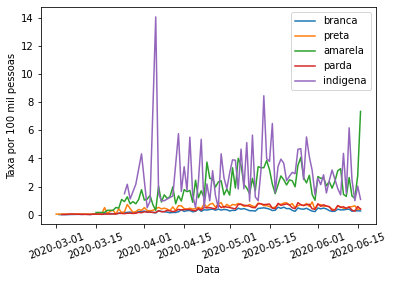

In [21]:
etnias = {1:'branca', 2:'preta', 3:'amarela', 4:'parda', 5:'indigena'}
axis = plt.axes()
for key, value in etnias.items():
    plt.plot(aux[aux['CS_RACA'] == key].DT_NOTIFIC, aux[aux['CS_RACA'] == key].TAXA, label=value)

axis.set_ylabel('Taxa por 100 mil pessoas')
axis.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
plt.savefig('../graficos/etnias_normalizado_todas.svg', dpi=300)
plt.savefig('../graficos/etnia_normalizado_todas.png', dpi=300)
plt.show()

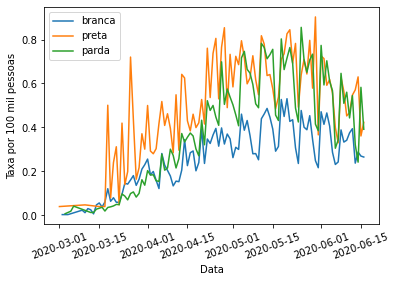

In [22]:
etnias = {1:'branca', 2:'preta', 4:'parda'}
axis = plt.axes()
for key, value in etnias.items():
    plt.plot(aux[aux['CS_RACA'] == key].DT_NOTIFIC, aux[aux['CS_RACA'] == key].TAXA, label=value)

axis.set_ylabel('Taxa por 100 mil pessoas')
axis.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
plt.savefig('../graficos/etnias_normalizado_algumas.svg', dpi=300)
plt.savefig('../graficos/etnia_normalizado_algumas.png', dpi=300)
plt.show()

In [26]:
dffinal = pd.pivot_table(aux, values='TAXA', index=['DT_NOTIFIC'],
                    columns=['CS_RACA'], aggfunc=np.sum, fill_value=0)
dffinal

CS_RACA,1.0,2.0,3.0,4.0,5.0
DT_NOTIFIC,,,,,
2020-03-01,0.000000,0.040006,0.000000,0.000000,0.000000
2020-03-02,0.003391,0.000000,0.000000,0.000000,0.000000
2020-03-03,0.000000,0.000000,0.000000,0.007348,0.000000
2020-03-04,0.003391,0.000000,0.000000,0.000000,0.000000
2020-03-05,0.000000,0.000000,0.000000,0.018736,0.000000
...,...,...,...,...,...
2020-06-12,0.394231,0.547096,2.641292,0.544667,6.173242
2020-06-13,0.237526,0.570798,1.316565,0.321620,2.471910
2020-06-14,0.287898,0.629890,1.172723,0.242008,0.990246


In [72]:
dffinal = pd.pivot_table(aux, values='TAXA', index=['DT_NOTIFIC'],
                    columns=['CS_RACA'], aggfunc=np.sum, fill_value=0)

etnias = {1.0:'branca', 2.0:'preta', 3.0:'amarela', 4.0:'parda', 5.0:'indigena'}
columns = etnias.keys()
mov_avg_columns = []
over_columns = []
under_columns = []


n_step = 20
for col in columns:
    dffinal[f'{etnias[col]}_mov_avg'] = dffinal[col].rolling(window=n_step).mean()
    dffinal[f'{etnias[col]}_std'] = dffinal[col].rolling(window=n_step).std()
    #dffinal[f'{col}_under'] = dffinal[f'{col}_mov_avg'] - 1.96 * dffinal[f'{col}_std'] / np.sqrt(n_step)
    #dffinal[f'{col}_over'] = dffinal[f'{col}_mov_avg'] + 1.96 * dffinal[f'{col}_std'] / np.sqrt(n_step)
    mov_avg_columns.append(f'{etnias[col]}_mov_avg')
    #over_columns.append(f'{col}_over')
    #under_columns.append(f'{col}_under')
    
    
dffinal

CS_RACA,1.0,2.0,3.0,4.0,5.0,branca_mov_avg,branca_std,preta_mov_avg,preta_std,amarela_mov_avg,amarela_std,parda_mov_avg,parda_std,indigena_mov_avg,indigena_std
DT_NOTIFIC,,,,,,,,,,,,,,,
2020-03-01,0.000000,0.040006,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,0.003391,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.000000,0.000000,0.000000,0.007348,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,0.003391,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,0.000000,0.000000,0.000000,0.018736,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-12,0.394231,0.547096,2.641292,0.544667,6.173242,0.355967,0.086020,0.585982,0.144446,2.402724,0.771421,0.573864,0.152162,2.946811,1.562379
2020-06-13,0.237526,0.570798,1.316565,0.321620,2.471910,0.356046,0.085904,0.589921,0.142814,2.369484,0.804161,0.568705,0.159074,2.924839,1.565990
2020-06-14,0.287898,0.629890,1.172723,0.242008,0.990246,0.346595,0.082225,0.589428,0.142650,2.252593,0.799467,0.538042,0.160032,2.741944,1.567734


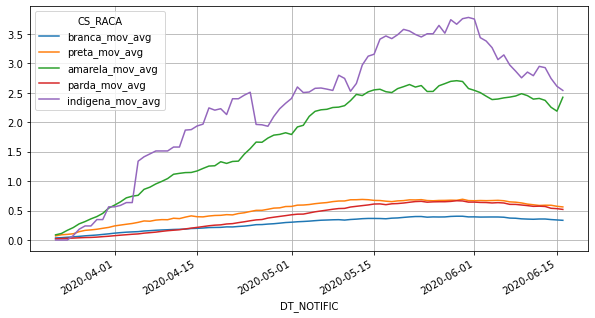

In [75]:
dffinal.plot(kind='line', y= mov_avg_columns, figsize=(10,5))
plt.grid()
plt.savefig('../graficos/etnias_normalizado_mediamovel_todas.svg', dpi=300)
plt.savefig('../graficos/etnia_normalizado_mediamovel_todas.png', dpi=300)

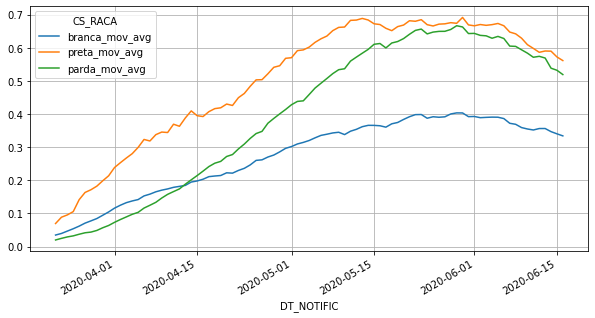

In [77]:
algumas_col = mov_avg_columns.copy()
algumas_col.remove('amarela_mov_avg')
algumas_col.remove(f'{etnias[5.0]}_mov_avg')
dffinal.plot(kind='line', y= algumas_col, figsize=(10,5))
plt.grid()
plt.savefig('../graficos/etnias_normalizado_mediamovel_algumas.svg', dpi=300)
plt.savefig('../graficos/etnia_normalizado_mediamovel_algumas.png', dpi=300)